In [1]:
# Import package pandas for data analysis
# Set to display enough columns
import pandas as pd
pd.set_option('display.max_columns', 100)

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Import to allow PDF of multiple pages
from matplotlib.backends.backend_pdf import PdfPages

# Import Seaborn for visualistaion library
import seaborn as sns

# Import to allow date to be converted to day of the week
import datetime

#For showing plots directly in the notebook run the command below
%matplotlib inline

In [2]:
# Read in csv file. Header not included with data so added here.
parse_date = ['last_update']
df = pd.read_csv('results_to_23_03_19.csv', names=['address', 'contract_name', 'name', 'last_update', 'lng', 'lat', 'status', 'available_bikes', 'bonus', 'available_bike_stands', 'number', 'bike_stands', 'banking'], parse_dates=parse_date)


In [3]:
# Check how many rows and columns the dataframe has
print ('The file has', df.shape[0], 'rows and', df.shape[1], 'columns')

The file has 773272 rows and 13 columns


In [4]:
df.head(5)

,address,contract_name,name,last_update,lng,lat,status,available_bikes,bonus,available_bike_stands,number,bike_stands,banking
0,Blessington Street,Dublin,BLESSINGTON STREET,2019-02-13 22:21:35,-6.26814,53.356769,OPEN,6,0,14,2,20,1
1,Blessington Street,Dublin,BLESSINGTON STREET,2019-02-13 22:31:44,-6.26814,53.356769,OPEN,5,0,15,2,20,1
2,Blessington Street,Dublin,BLESSINGTON STREET,2019-02-13 22:41:52,-6.26814,53.356769,OPEN,5,0,15,2,20,1
3,Blessington Street,Dublin,BLESSINGTON STREET,2019-02-13 22:52:00,-6.26814,53.356769,OPEN,5,0,15,2,20,1
4,Blessington Street,Dublin,BLESSINGTON STREET,2019-02-13 23:00:06,-6.26814,53.356769,OPEN,6,0,14,2,20,1


Date and time will need to be seperated in to columns. One for hours, one for minutes and one for day of the week. Make three new columns.

In [5]:
# Check for duplicate rows - numerical only, does not show values
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Check for duplicate columns - numerical only, does not show values
print('Duplicate columns:',df.columns.size - df.columns.unique().size)


Duplicate rows: 0
Duplicate columns: 0


In [6]:
# Convert date to a day of the week in a new column. 
# Create new column with hour
# Create new column with minute

df['weekday'] = df['last_update']
df['hour'] = df['last_update']
df['minute'] = df['last_update']

df['weekday'] = df['weekday'].apply(lambda date: datetime.datetime.weekday(date))
df['hour'] = df['hour'].apply(lambda time: time.hour)
df['minute'] = df['minute'].apply(lambda time: time.minute)


**Note: The weekday column goes from 0 to 6. 0 is Monday and 6 is Sunday.**

In [7]:
# Check data types
df.dtypes

address                          object
contract_name                    object
name                             object
last_update              datetime64[ns]
lng                             float64
lat                             float64
status                           object
available_bikes                   int64
bonus                             int64
available_bike_stands             int64
number                            int64
bike_stands                       int64
banking                           int64
weekday                           int64
hour                              int64
minute                            int64
dtype: object

In [8]:
categorical_columns = df[['address', 'contract_name', 'name', 'last_update', 'status']]
for column in categorical_columns:
    df[column] = df[column].astype('category')
    

In [9]:
# Select columns with continuous data.
df.select_dtypes(['float64', 'int64']).describe().T


,count,mean,std,min,25%,50%,75%,max
lng,773272.0,-6.263887,0.017875,-6.310015,-6.275071,-6.262980,-6.25090,-6.230852
lat,773272.0,53.345378,0.007474,53.330091,53.339764,53.344603,53.35023,53.359967
available_bikes,773272.0,11.171029,10.796507,0.000000,2.000000,8.000000,18.00000,40.000000
bonus,773272.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
available_bike_stands,773272.0,20.476818,11.697767,0.000000,12.000000,20.000000,30.00000,44.000000
number,773272.0,57.362160,32.576279,2.000000,30.000000,57.000000,85.00000,115.000000
bike_stands,773272.0,31.936661,7.539598,16.000000,29.000000,30.000000,40.00000,40.000000
banking,773272.0,0.331287,0.470676,0.000000,0.000000,0.000000,1.00000,1.000000
weekday,773272.0,3.003651,1.916867,0.000000,1.000000,3.000000,5.00000,6.000000
hour,773272.0,11.893396,6.635299,0.000000,7.000000,12.000000,17.00000,23.000000


In [10]:
# Check for any columns with missing values
df.isnull().sum()


address                  0
contract_name            0
name                     0
last_update              0
lng                      0
lat                      0
status                   0
available_bikes          0
bonus                    0
available_bike_stands    0
number                   0
bike_stands              0
banking                  0
weekday                  0
hour                     0
minute                   0
dtype: int64

In [11]:
# Shows the median of each continuous column
df.select_dtypes(['float64', 'int64']).median()


lng                      -6.262980
lat                      53.344603
available_bikes           8.000000
bonus                     0.000000
available_bike_stands    20.000000
number                   57.000000
bike_stands              30.000000
banking                   0.000000
weekday                   3.000000
hour                     12.000000
minute                   30.000000
dtype: float64

In [12]:
# Check the cardinality of continuous features
df.select_dtypes(['float64', 'int64']).nunique()


lng                      113
lat                      113
available_bikes           41
bonus                      1
available_bike_stands     43
number                   113
bike_stands               18
banking                    2
weekday                    7
hour                      24
minute                    60
dtype: int64

In [13]:
# Drop the bonus as only a single value
df.drop(['bonus'], axis=1, inplace = True)


In [14]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T


,count,unique,top,freq
address,773272,113,Princes Street / O'Connell Street,8449
contract_name,773272,1,Dublin,773272
name,773272,113,PRINCES STREET / O'CONNELL STREET,8449
last_update,773272,646653,2019-03-12 22:14:42,34
status,773272,2,OPEN,769935


Can drop contract name and status as only a single value for each

In [15]:
# Drop categorical columns with a single value
df.drop(['status', 'contract_name'], axis=1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cb16048>,
      dtype=object)

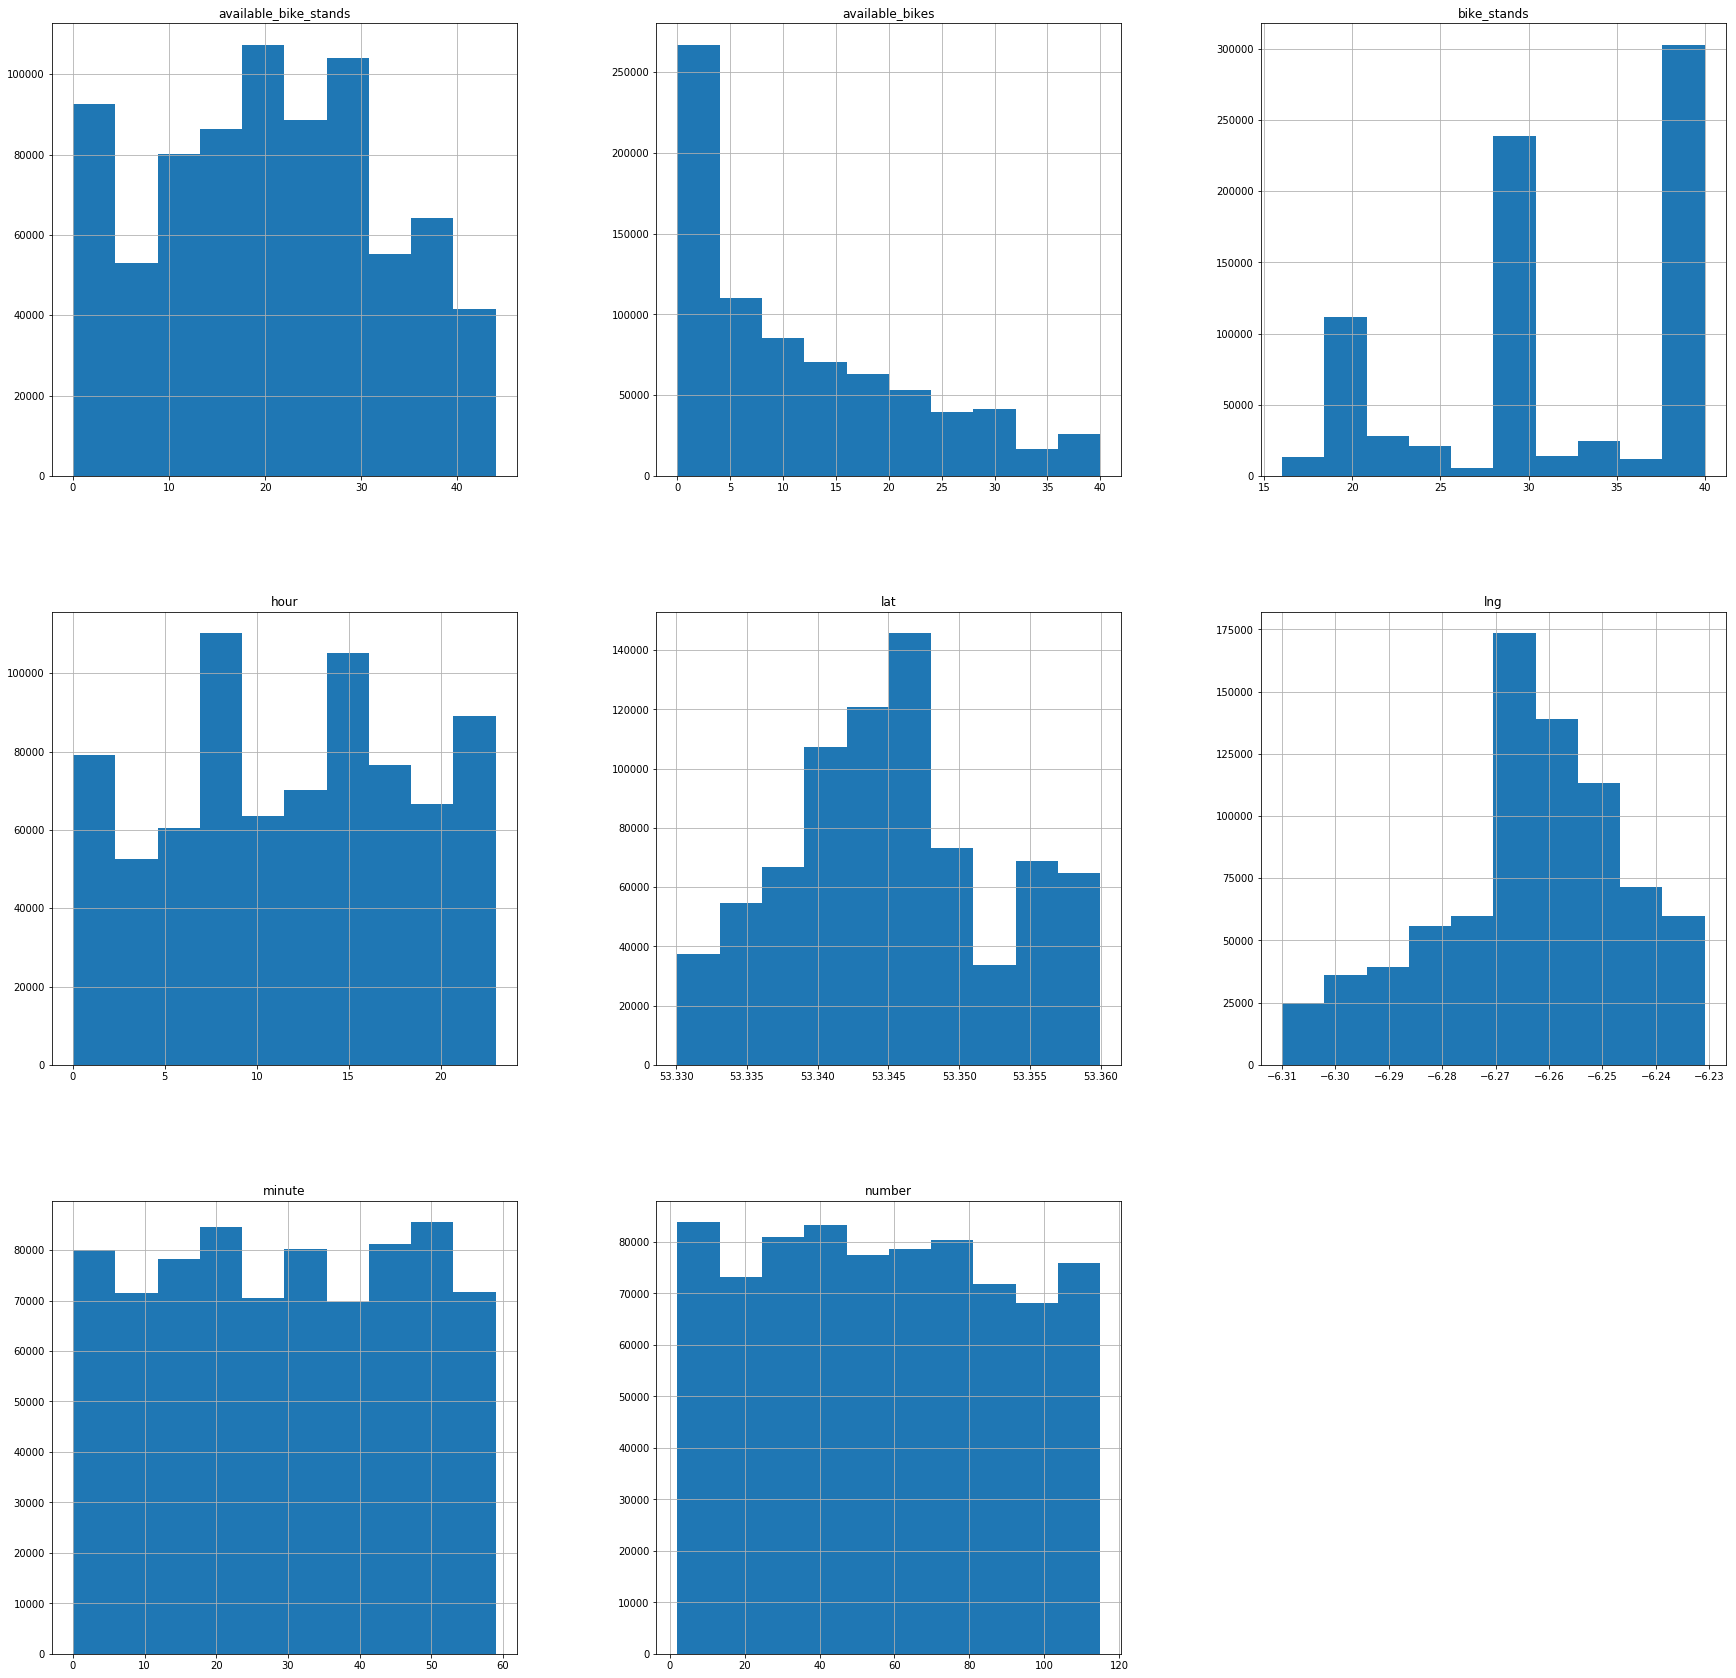

In [17]:
# View histogram of continuous columns. Banking and weekday will be shown on bar chart
continuous_columns = df[['lng', 'lat', 'available_bikes', 'available_bike_stands',
                        'number', 'bike_stands', 'hour', 'minute']].columns

df[continuous_columns].hist(figsize=(30,30))


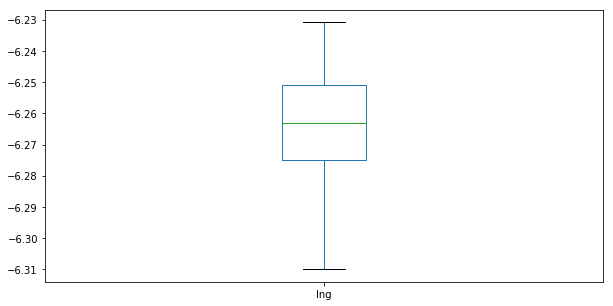

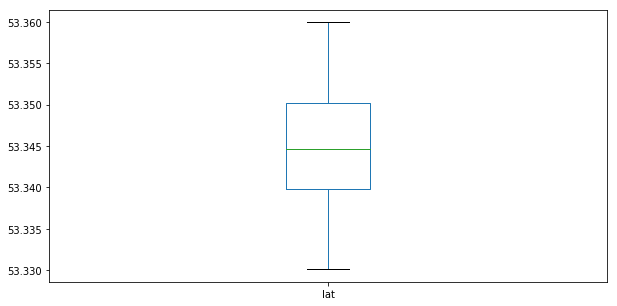

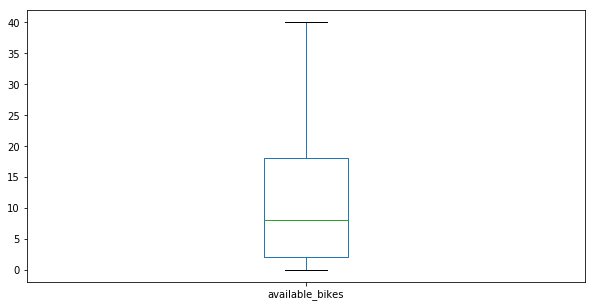

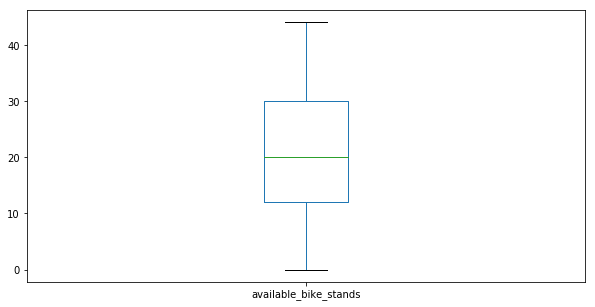

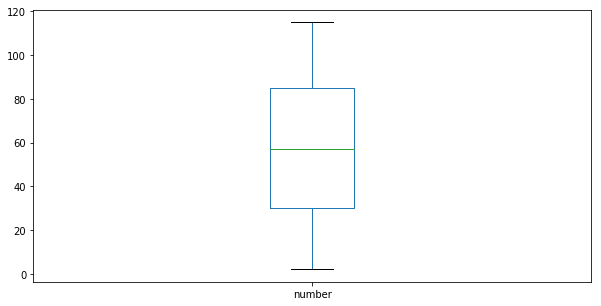

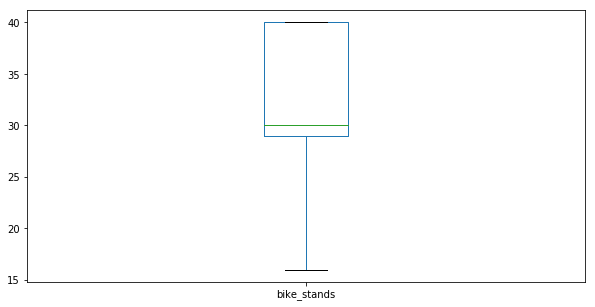

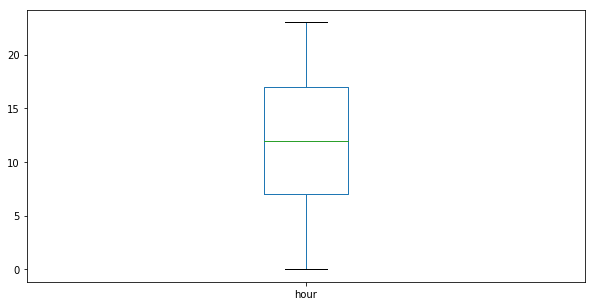

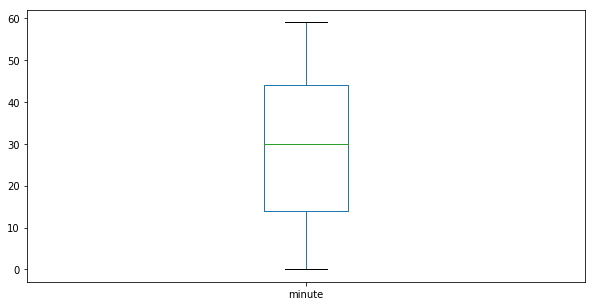

In [18]:
for column in continuous_columns:
    df[column].plot(kind = 'box', figsize=(10,5))
    plt.show()
    

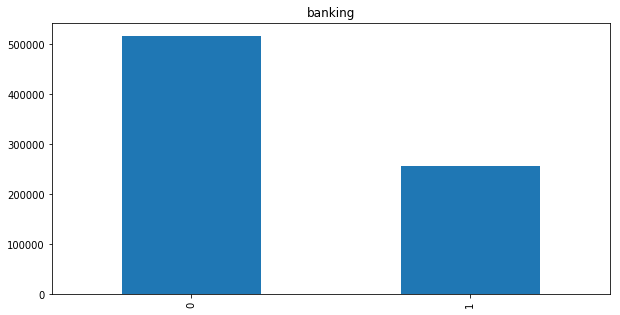

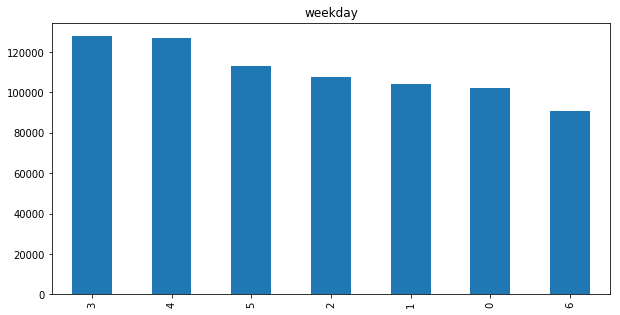

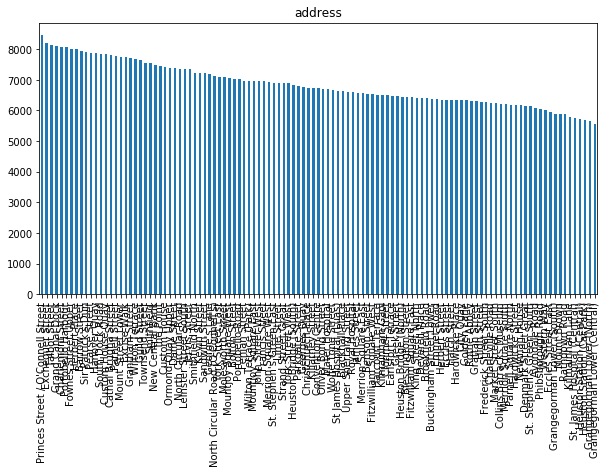

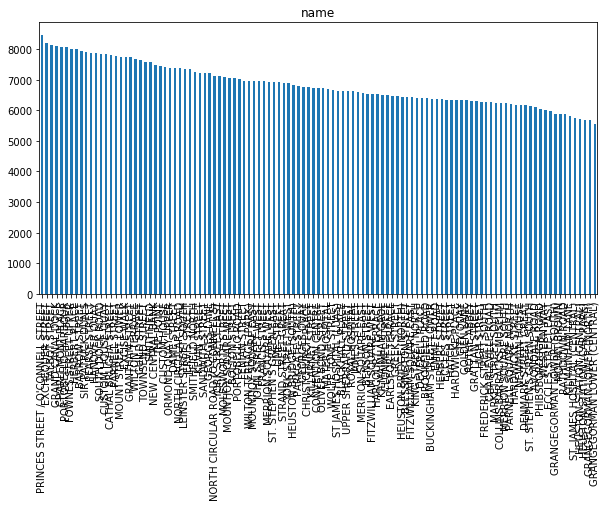

In [20]:
bar_chart_columns = df[['banking', 'weekday', 'address', 'name']]

for column in bar_chart_columns:
    df[column].value_counts().plot(kind='bar', title=column, figsize=(10,5))
    plt.show()
    

Can drop lat, lng, name and address as the number should identify the station along with it's location. Last updated can be dropped as it is not longer required as day of the week, hour and minute have been retained. Can also drop numbe of available bike stands - this can become a target feature later.

In [21]:
# Drop unneeded columns 
df.drop(['name', 'address', 'lng', 'lat', 'available_bike_stands', 'last_update'], axis=1, inplace = True)


In [22]:
# Change all columns to float64 for ML model
int_to_float = df[['available_bikes', 'bike_stands', 
                          'number', 'banking', 'weekday', 'hour', 'minute']]
for column in int_to_float:
    df[column] = df[column].astype('float64')
    

In [23]:
df.to_csv('to_23_03_19.csv')